In [1]:
# IT7143_Course Project_Group 5_Diabetes Risk Prediction and Analysis - diabetes_prediction_dataset

# Bhavitha, Redrouthu - bredrout
# Mythili, Jayaraman - mjayaram
# Vidhi, Dave, vdave3
# Viswa Narendra Reddy, Panati, vpanati


In [1]:
#IMPORT Statements

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

sns.set_style('darkgrid')

%matplotlib inline


In [2]:
# Function to plot model loss
def plot_model_loss(hist, title):
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper right')
    plt.show()

# Function to plot model accuracy
def plot_model_accuracy(hist, title):
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='lower right')
    plt.show()
    

In [3]:
# Load the dataset
data = pd.read_csv('diabetes_prediction_dataset.csv')
data.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
# Generate dataset summary statistics
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Summary of DataFrame structure, types
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


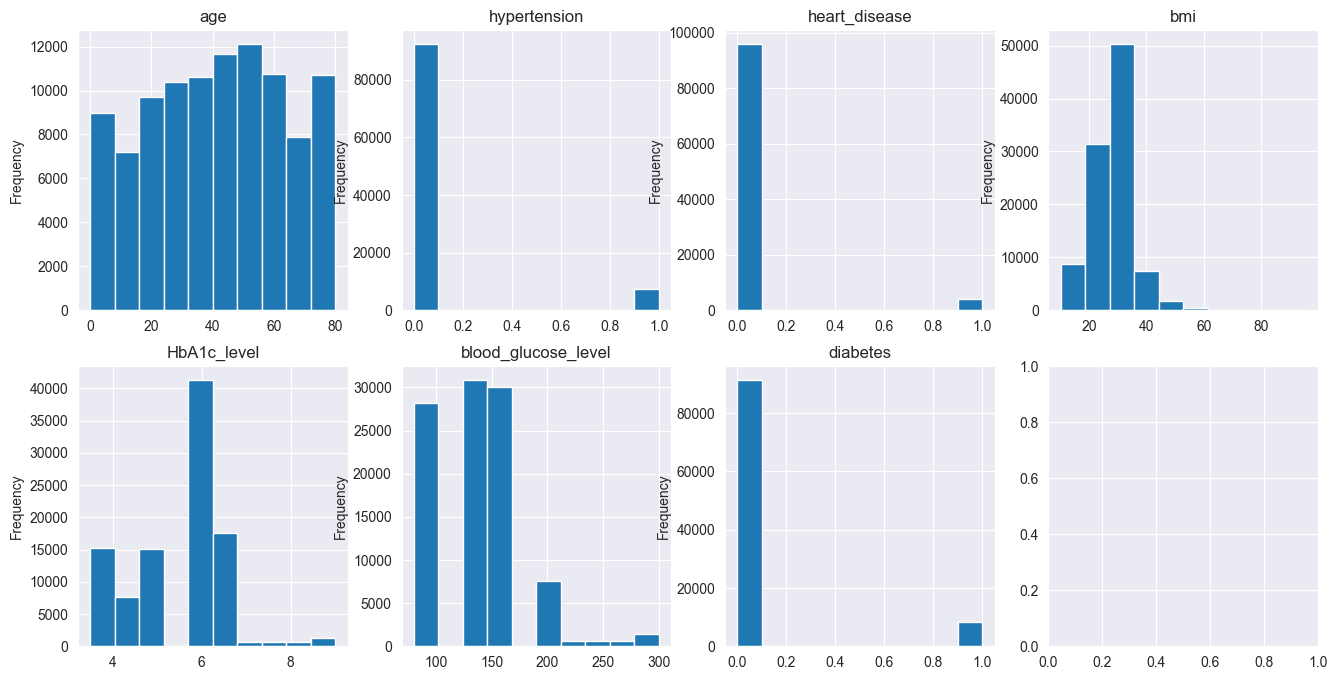

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

numeric_columns = data.select_dtypes(include='number').columns.tolist()

for idx, column in enumerate(numeric_columns):
    row_idx = idx // 4
    col_idx = idx % 4
    data[column].plot(kind='hist', ax=axes[row_idx, col_idx], title=column)

plt.show()



<AxesSubplot:>

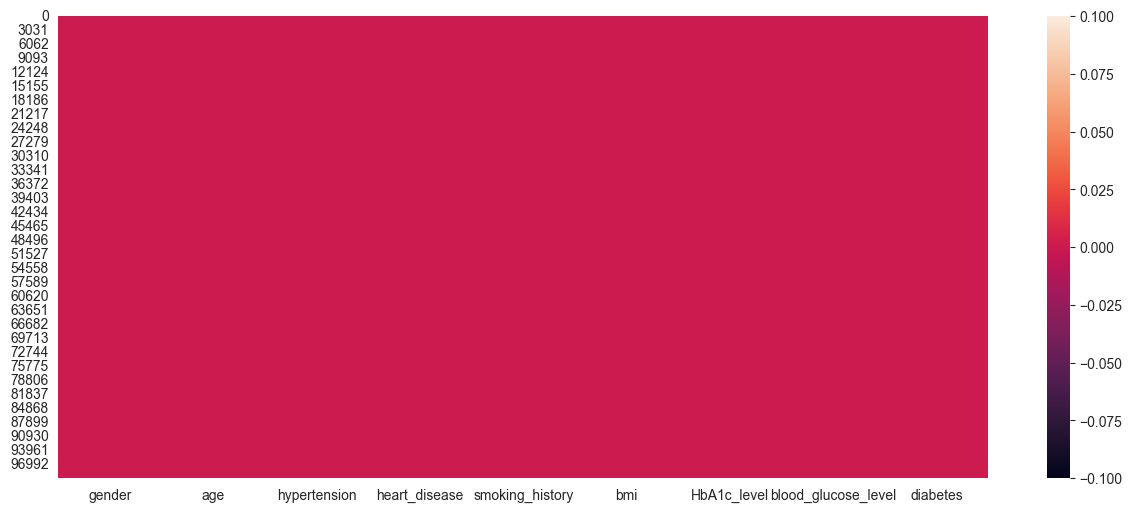

In [7]:
# Null HeatMap
plt.figure(figsize=(15,6))
sns.heatmap(data.isna())


<AxesSubplot:xlabel='diabetes', ylabel='count'>

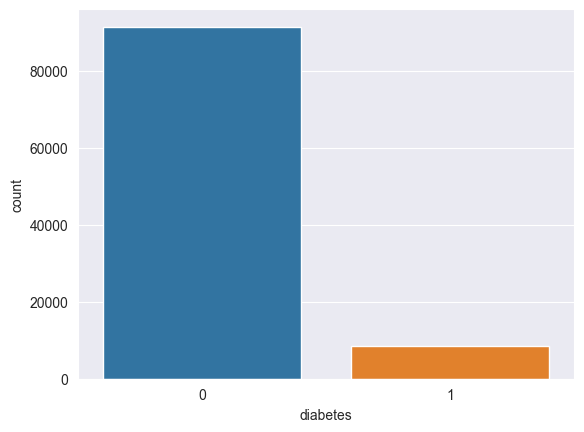

In [8]:
# Small EDA
sns.countplot(x=data['diabetes'])


In [9]:
# Preprocessing
data['gender'] = data['gender'].astype('category').cat.codes
data['smoking_history'] = data['smoking_history'].astype('category').cat.codes

# Regression: Predict blood_glucose_level
X_reg = data.drop(['blood_glucose_level'], axis=1)
y_reg = data['blood_glucose_level']
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg_model = LinearRegression()
reg_model.fit(X_train_reg, y_train_reg)
y_pred_reg = reg_model.predict(X_test_reg)

print(f"Regression: Mean squared error: {mean_squared_error(y_test_reg, y_pred_reg)}")
print(f"Regression: R2 score: {r2_score(y_test_reg, y_pred_reg)}")


Regression: Mean squared error: 1360.4133929146158
Regression: R2 score: 0.17494754876764274


In [10]:
# Anomaly Detection: Detect outliers in the dataset
anomaly_detector = IsolationForest(contamination=0.05, random_state=42)
anomaly_detector.fit(data)
outliers = anomaly_detector.predict(data)

# Print the number of outliers detected
print(f"Anomaly Detection: Number of outliers detected: {np.count_nonzero(outliers == -1)}")


C:\Users\Bhavitha Redrouthu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


Anomaly Detection: Number of outliers detected: 5000


In [11]:
# Encode categorical variables
le_gender = LabelEncoder()
le_smoking = LabelEncoder()
data['gender'] = le_gender.fit_transform(data['gender'])
data['smoking_history'] = le_smoking.fit_transform(data['smoking_history'])

# Scale numerical features
scaler = MinMaxScaler()
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


In [12]:
# Split the dataset
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Splits validation data further
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Prints shapes of dataset splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(50000, 8) (50000, 8) (50000,) (50000,)


# Sk-Learn Models

# Logistic Regression

In [13]:
# Classification: Predict diabetes using Logistic Regression
logistic_classifier = LogisticRegression(random_state=42)
logistic_classifier.fit(X_train, y_train)
y_pred_logistic = logistic_classifier.predict(X_test)

print("Classification: Logistic Regression")
print(classification_report(y_test, y_pred_logistic))


Classification: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     45741
           1       0.88      0.61      0.72      4259

    accuracy                           0.96     50000
   macro avg       0.92      0.80      0.85     50000
weighted avg       0.96      0.96      0.96     50000



# Random Forest Classifier

In [14]:
#Tuning hyperparameters via grid search 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf_classifier = RandomForestClassifier()

param_grid = {   'n_estimators' : [50, 100, 150, ],
    
                'criterion': ['entropy','gini'],
            
               'max_depth': [3,4,5,],
              
              }

In [15]:
grid_search_rf = GridSearchCV(estimator=rf_classifier, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1, verbose=1)

In [16]:
#Fit the GridSearchCV
grid_search_rf = grid_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


In [17]:
#Displaying the best score given by GridSearchCV
print(grid_search_rf.best_score_)

0.9720599999999999


In [18]:
#Finding the best parameters given by GridSearch CV 
print(grid_search_rf.best_params_)

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 50}


In [19]:
#Making predictions using Random Forest Classifier and displaying 
#first 20 predicted values
y_pred = grid_search_rf.predict(X_test) 
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [20]:
#Printing the Accuracy Score For Random Forest Model 
from sklearn.metrics import accuracy_score
accu_rf = accuracy_score(y_pred,y_test)

print('Test Accuracy Random Forest Classifer :', accu_rf)

Test Accuracy Random Forest Classifer : 0.97168


# Decision Tree

In [21]:
#Tuning hyperparameters via grid search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

param_grid = [{
    'max_depth': [3,4,5,6,7],
    'max_features' : [3, 5, 7],
    'min_samples_split' : [10, 20, 30, 40],
    'min_samples_leaf' : [10, 20, 30, 40]
}]

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', return_train_score=True)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 4, 5, 6, 7],
                          'max_features': [3, 5, 7],
                          'min_samples_leaf': [10, 20, 30, 40],
                          'min_samples_split': [10, 20, 30, 40]}],
             return_train_score=True, scoring='accuracy')

In [22]:
#Displaying the parameters,best score given by GridSearchCV
print(grid_search.best_params_)
print(grid_search.best_score_)

{'max_depth': 7, 'max_features': 5, 'min_samples_leaf': 20, 'min_samples_split': 40}
0.97218


In [23]:
#Printing the Accuracy Score,F1Score For Decision Tree
best_dt = grid_search.best_estimator_
testY_pred_dt = best_dt.predict(X_test)
print('decision tree accuracy: ', accuracy_score(y_test, testY_pred_dt))
print('decision tree f1: ', f1_score(y_test, testY_pred_dt))

decision tree accuracy:  0.97168
decision tree f1:  0.8006195437904816


# K Nearest Neighbors Classifier

In [24]:
#Tuning hyperparameters via grid search 
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
param_grid = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (10,20,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
}

In [25]:
grid_search_knn = GridSearchCV(estimator=knn_classifier, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  n_jobs=-1, verbose=1)

In [26]:
grid_search_knn = grid_search_knn.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [27]:
#Displaying the parameters,best score given by GridSearchCV
print(grid_search_knn.best_score_)
print(grid_search_knn.best_params_)

0.96052
{'leaf_size': 10, 'n_neighbors': 10, 'p': 2, 'weights': 'distance'}


In [28]:
#Making predictions using K-Neighbors Classifier and displaying 
#first 20 predicted values
y_pred = grid_search_knn.predict(X_test) 
y_pred[0:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [29]:
#Printing the Accuracy Score For K-Neighbors Classifier
from sklearn.metrics import accuracy_score
accu_knn = accuracy_score(y_pred,y_test)

print('Test Accuracy KNN Classifer :', accu_knn)

Test Accuracy KNN Classifer : 0.95972


# Non Sk-Learn Model

# Deep Neural Network Model - Multilayer Perception

In [30]:
# Deep Neural Network Model - Multilayer Perception
batch_size = 512
data_tf_tr = tf.data.Dataset.from_tensor_slices((X_train, y_train))
data_tr_batches = data_tf_tr.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

data_tf_tre_eval = tf.data.Dataset.from_tensor_slices((X_test, y_test))
data_tre_batches_eval = data_tf_tre_eval.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)
data_tf_tre = tf.data.Dataset.from_tensor_slices(X_test)
data_tre_batches = data_tf_tre.batch(batch_size).cache().prefetch(tf.data.AUTOTUNE)

# Model fitting
from tensorflow.keras.layers import Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping

e = EarlyStopping(patience=5, restore_best_weights=True, verbose=1)
n = 8
model = Sequential()

model.add(Input(shape=(X_train.shape[1],)))

model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))
model.add(Dense(n * X_train.shape[1], activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy',
                       tf.keras.metrics.AUC(name='auc_precision_recall',
                                            curve='PR',
                                            num_thresholds=10000)])

hist4 = model.fit(data_tr_batches, epochs=50, callbacks=[e], validation_data=data_tr_batches, verbose=1)


Epoch 1/50
98/98 [==============================] - 3s 9ms/step - loss: 0.2937 - accuracy: 0.9150 - auc_precision_recall: 0.1362 - val_loss: 0.1577 - val_accuracy: 0.9152 - val_auc_precision_recall: 0.7227
Epoch 2/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1337 - accuracy: 0.9511 - auc_precision_recall: 0.7568 - val_loss: 0.1130 - val_accuracy: 0.9608 - val_auc_precision_recall: 0.8167
Epoch 3/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1158 - accuracy: 0.9599 - auc_precision_recall: 0.8085 - val_loss: 0.1096 - val_accuracy: 0.9624 - val_auc_precision_recall: 0.8246
Epoch 4/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1116 - accuracy: 0.9619 - auc_precision_recall: 0.8186 - val_loss: 0.1077 - val_accuracy: 0.9631 - val_auc_precision_recall: 0.8304
Epoch 5/50
98/98 [==============================] - 1s 6ms/step - loss: 0.1095 - accuracy: 0.9622 - auc_precision_recall: 0.8232 - val_loss: 0.1053 - val_accuracy: 0.9647 - val

Epoch 41/50
98/98 [==============================] - 1s 6ms/step - loss: 0.0846 - accuracy: 0.9708 - auc_precision_recall: 0.8733 - val_loss: 0.0833 - val_accuracy: 0.9709 - val_auc_precision_recall: 0.8783
Epoch 41: early stopping


In [31]:
# Evaluate the model
loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')


Test accuracy: 0.9708
Test AUC: 0.8777


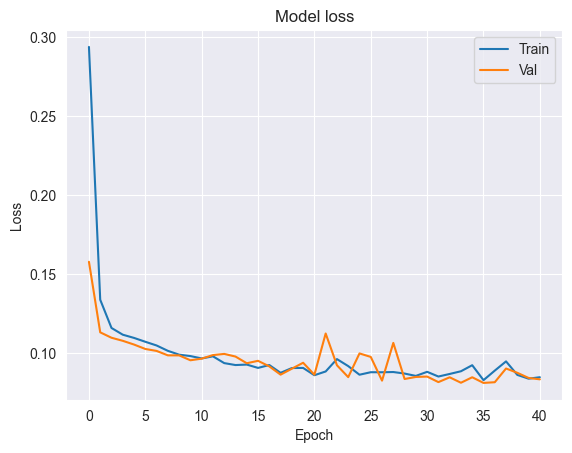

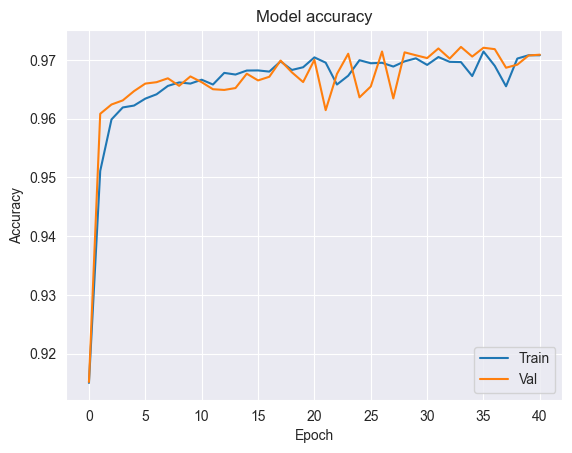

In [32]:
# Call the plot functions
plot_model_loss(hist4, 'Model loss')
plot_model_accuracy(hist4, 'Model accuracy')


In [33]:
# Print the summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 64)                4

<AxesSubplot:>

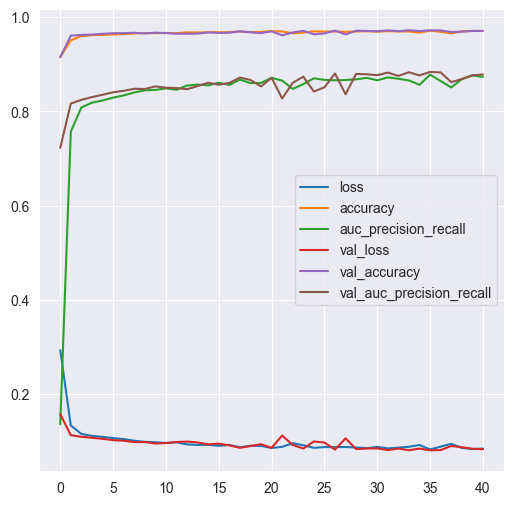

In [34]:
# Plot training history of model
d1=pd.DataFrame(hist4.history)
d1.plot(figsize=(6,6))


In [35]:
# Classification report for model evaluation
pred1 = (model.predict(data_tre_batches) > 0.5).astype(int)

from sklearn.metrics import classification_report

print(classification_report(pred1, y_test))


98/98 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     47174
           1       0.66      1.00      0.79      2826

    accuracy                           0.97     50000
   macro avg       0.83      0.98      0.89     50000
weighted avg       0.98      0.97      0.97     50000



# Displaying The Accuracy Score Of All Models

In [42]:
# Add the accuracy scores to the dictionary
accuracy_scores = {
    'Logistic Regression': accuracy_score(y_test, y_pred_logistic),
    'Random Forest Classifier': accu_rf,
    'Decision Tree': accuracy_score(y_test, testY_pred_dt), 
    'K-Nearest Neighbors Classifier' : accu_knn,
    'DNN Model - Multilayer Perception': test_accuracy
}

# Find the model with the highest accuracy
best_model = max(accuracy_scores, key=accuracy_scores.get)
best_model_accuracy = accuracy_scores[best_model]

# Compare the accuracy of all models
print("\nAccuracy comparison of all models:\n")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.5f}")

print(f"\nThe best model is {best_model} with an accuracy of {best_model_accuracy:.5f}")



Accuracy comparison of all models:

Logistic Regression: 0.95942
Random Forest Classifier: 0.97168
Decision Tree: 0.97168
K-Nearest Neighbors Classifier: 0.95972
DNN Model - Multilayer Perception: 0.97078

The best model is Random Forest Classifier with an accuracy of 0.97168


# Model Performance Comparsion 

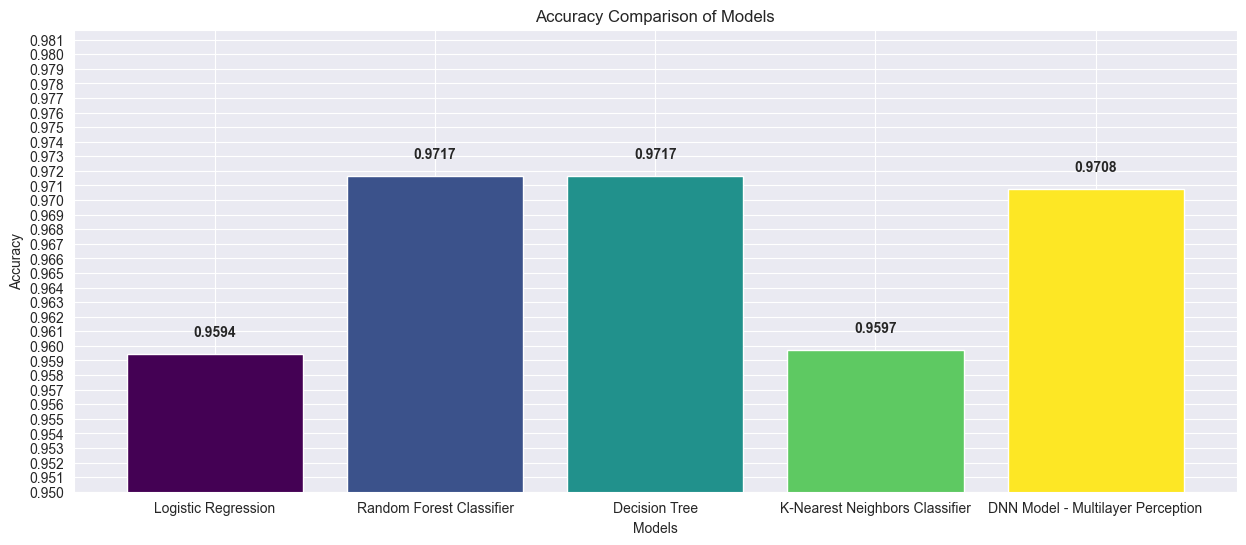

In [39]:
# Plot the accuracy of each model
plt.figure(figsize=(15, 6))
model_names = list(accuracy_scores.keys())
accuracies = list(accuracy_scores.values())
colors = plt.cm.get_cmap('viridis', len(model_names))

bars = plt.bar(model_names, accuracies, color=colors(np.arange(len(model_names))))
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Models')

plt.ylim(0.95, max(accuracies) + 0.01)
plt.yticks(np.arange(0.95, max(accuracies) + 0.01, 0.001))

# Display the accuracy value on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height + 0.001, f"{height:.4f}",
                   ha='center', va='bottom', fontweight='bold')

plt.show()


In [40]:
# Top 10 combinations with the highest probabilities of getting diabetes - Values

age_groups = np.arange(20, 90, 10)
sexes = [0, 1]  # 0: Female, 1: Male
smoking_habits = [0, 1]  # 0: Non-smoker, 1: Smoker

combinations = [(age, sex, smoke) for age in age_groups for sex in sexes for smoke in smoking_habits]

mean_feature_values = np.mean(X_train, axis=0)

updated_combinations = [(age / 100, sex, smoke, *mean_feature_values[3:]) for age, sex, smoke in combinations]

probabilities = logistic_classifier.predict_proba(updated_combinations)[:, 1]

results = list(zip(combinations, probabilities))

sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

print("Top 10 combinations with the highest probabilities of getting diabetes:")
for i, (combination, probability) in enumerate(sorted_results[:10]):
    age, sex, smoke = combination
    sex_str = "Female" if sex == 0 else "Male"
    smoke_str = "Non-smoker" if smoke == 0 else "Smoker"
    print(f"{i + 1}. Age: {age}, Sex: {sex_str}, Smoking Habits: {smoke_str} - Probability: {probability:.4f}")
    

Top 10 combinations with the highest probabilities of getting diabetes:
1. Age: 80, Sex: Male, Smoking Habits: Smoker - Probability: 0.0730
2. Age: 70, Sex: Male, Smoking Habits: Smoker - Probability: 0.0712
3. Age: 60, Sex: Male, Smoking Habits: Smoker - Probability: 0.0695
4. Age: 50, Sex: Male, Smoking Habits: Smoker - Probability: 0.0678
5. Age: 40, Sex: Male, Smoking Habits: Smoker - Probability: 0.0662
6. Age: 30, Sex: Male, Smoking Habits: Smoker - Probability: 0.0646
7. Age: 20, Sex: Male, Smoking Habits: Smoker - Probability: 0.0630
8. Age: 80, Sex: Male, Smoking Habits: Non-smoker - Probability: 0.0354
9. Age: 70, Sex: Male, Smoking Habits: Non-smoker - Probability: 0.0345
10. Age: 60, Sex: Male, Smoking Habits: Non-smoker - Probability: 0.0337


C:\Users\Bhavitha Redrouthu\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


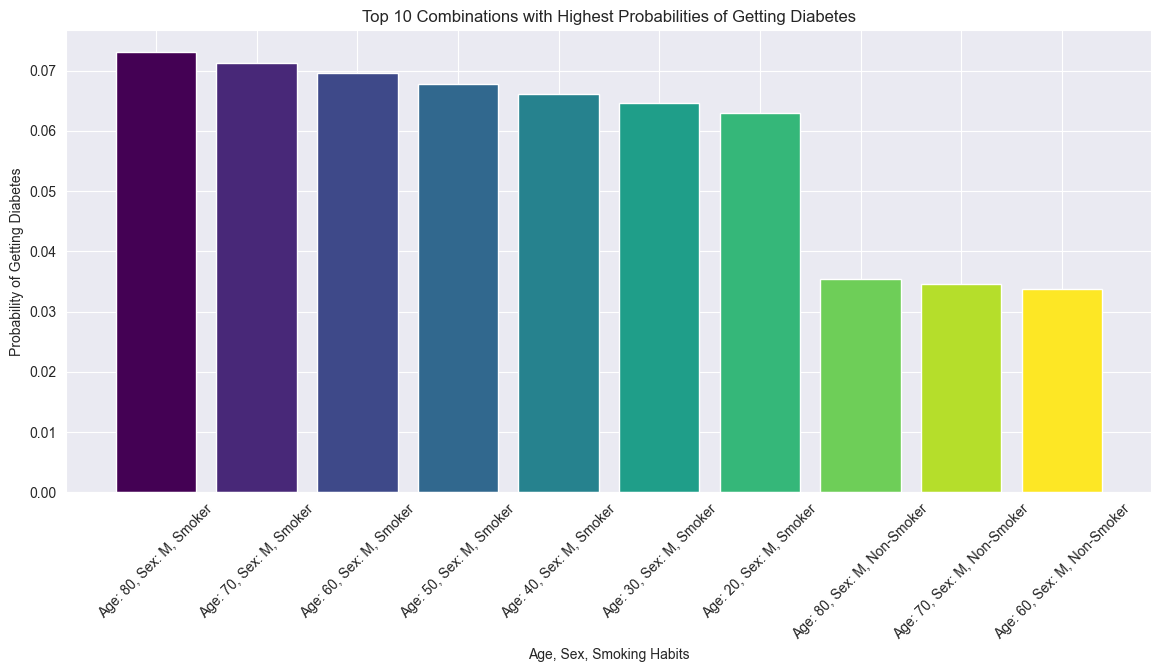

In [41]:
# Top 10 combinations with the highest probabilities of getting diabetes - Graph

# Combine combinations with their probabilities and sort them by probability
combinations_with_probabilities = list(zip(updated_combinations, probabilities))
combinations_with_probabilities.sort(key=lambda x: x[1], reverse=True)

# Get the top 10 combinations with the highest probabilities
top_10_combinations = combinations_with_probabilities[:10]

# Separate the combinations and probabilities into separate lists
top_10_combinations_values, top_10_probabilities = zip(*top_10_combinations)

# Create the x-axis labels
x_labels = [f"Age: {int(age * 100)}, Sex: {'M' if sex == 1 else 'F'}, {'Smoker' if smoke == 1 else 'Non-Smoker'}" for age, sex, smoke, *_ in top_10_combinations_values]

# Plot the bar graph with different colors
colors = plt.cm.viridis(np.linspace(0, 1, len(top_10_combinations_values)))
plt.figure(figsize=(14, 6))
plt.bar(x_labels, top_10_probabilities, color=colors)
plt.xticks(rotation=45)
plt.xlabel("Age, Sex, Smoking Habits")
plt.ylabel("Probability of Getting Diabetes")
plt.title("Top 10 Combinations with Highest Probabilities of Getting Diabetes")
plt.show()


# Conclusion Classification:

In [ ]:
We can observe from logistic regression, decision tree, random forest , KNN and Deep Neural Network Model - Multilayer 
Perception classifers, Random Forest, Decision Tree got the highest accuracy  97.17%, hence we can consider  
Random Forest or Decision Tree as the best model we have on this data set and can be used for the deployment purpose.